In [1]:
import numpy as np
import matplotlib.pyplot as plt
from h5py import File

import jax
jax.config.update("jax_enable_x64", True)

import jax.numpy as jnp
from jax import random

import numpyro
from numpyro import sample, plate, factor
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, init_to_sample
from numpyro.infer import Predictive

from candel import SPEED_OF_LIGHT, plot_corner

In [32]:


def modelA():
    mu = sample("mu", dist.Uniform(-10, 10))
    x = 0.5
    
    sigma = sample("sigma", dist.Uniform(0.0, 1))
    sample("obs", dist.Normal(mu, sigma), obs=x)



def modelB():
    mu = sample('mu', dist.Uniform(0, 1))

    czpred = mu #* SPEED_OF_LIGHT
    cz_obs = 0.5 #* SPEED_OF_LIGHT

    sigma = sample('sigma', dist.Uniform(0, 50))

    # ll = 0.
    # ll = - jnp.log(sigma_v)
    # ll += dist.Normal(czpred, sigma_v).log_prob(cz_obs)

    sample('obs', dist.Normal(czpred, sigma), obs=cz_obs)
    # factor('log_likelihood', ll)    

In [33]:
kernel = NUTS(modelA, )

# Set up and run MCMC
mcmc = MCMC(kernel, num_warmup=10000, num_samples=10000, num_chains=1)
mcmc.run(random.PRNGKey(0),)

mcmc.print_summary()
samples = mcmc.get_samples()

sample: 100%|██████████| 20000/20000 [00:02<00:00, 8143.01it/s, 9 steps of size 2.68e-01. acc. prob=0.86] 


                mean       std    median      5.0%     95.0%     n_eff     r_hat
        mu      0.51      0.55      0.50     -0.47      1.37   3080.31      1.00
     sigma      0.50      0.28      0.50      0.03      0.89    812.07      1.00

Number of divergences: 411


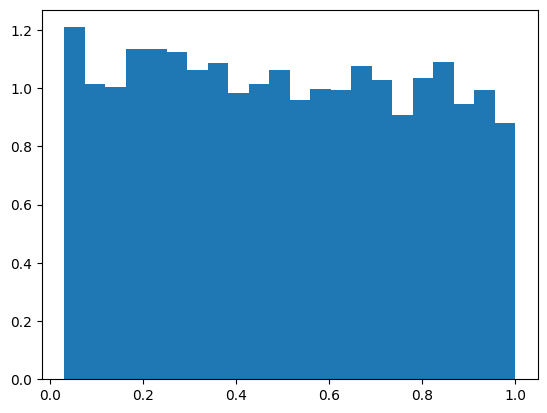

In [34]:
plt.figure()
plt.hist(samples['sigma'], bins="auto", density=True, )
plt.show()

In [24]:
# X = np.vstack((samples["mu"][:, 0], samples["mu"][:, 1], samples["sigma"])).T

# labels = ["mu1", "mu2", "sigma"]
# X = np.vstack((samples["mu"][:, 0], samples["sigma"])).T

X = {"sigma": samples["sigma"],
     "mu": samples["mu"]}

# X = {
#     "mu": samples["mu"],
#     # "mu_1": samples["mu"][:, 0],
#     # "mu_2": samples["mu"][:, 1],
#     "sigma": samples["sigma"],
#      }


/Users/rstiskalek/Projects/CANDEL/candel/util.py:383: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


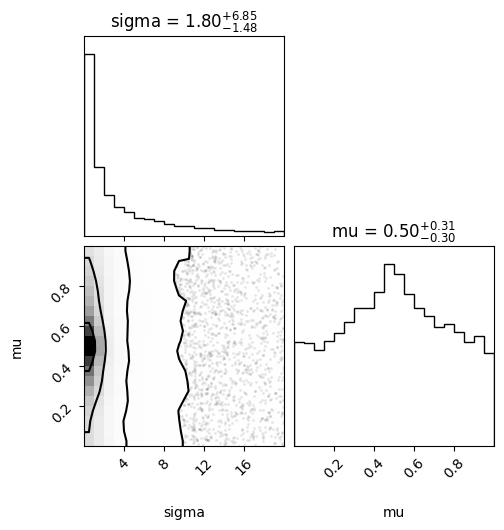

In [25]:
plot_corner(X,)

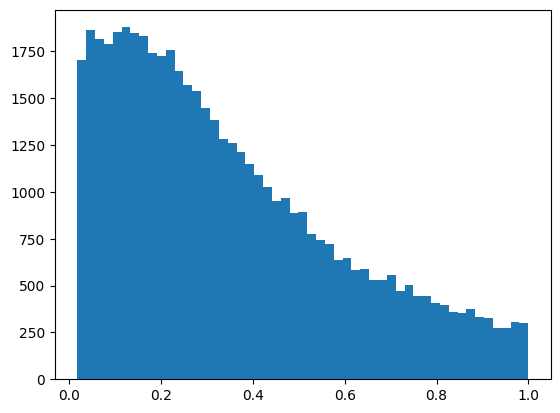

In [8]:
plt.figure()
plt.hist(samples["sigma"], bins="auto")
plt.show()